In [3]:
#Exemplar Notebook

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import io
import numpy as mp
import csv

In [15]:
#function to read in a file and put the contents in a list
#input parameter: a csv file name
#result:  returns a list
def loadList(fileName):
  with open(fileName, newline='') as f:
    reader = csv.reader(f)
    dataList = list(reader)
  return dataList

In [16]:
dictionary = loadList('dictionary.csv')
summer = loadList('summer.csv')

In [17]:
for i in range(0,5):
  print (dictionary[i][0] + ' - ' + dictionary[i][1] + ' - ' + dictionary[i][2] + ' - ' + dictionary[i][3]) 

Country - Code - Population - GDP per Capita
Afghanistan - AFG - 32526562 - 594.323081219966
Albania - ALB - 2889167 - 3945.21758150914
Algeria - ALG - 39666519 - 4206.03123244958
American Samoa* - ASA - 55538 - 


In [18]:
for i in range(0, 5):
  print (summer[i][0] + ' - ' + summer[i][1] + ' - ' + summer[i][2] + ' - ' + summer[i][3] + ' - ' + summer[i][4] + ' - ' + summer[i][5] + ' - ' + summer[i][6] + ' - ' + summer[i][7] + ' - ' + summer[i][8])

Year - City - Sport - Discipline - Athlete - Country - Gender - Event - Medal
1900 - Paris - Aquatics - Swimming - HALMAY, Zoltan - HUN - Men - 1500M Freestyle - Bronze
1900 - Paris - Aquatics - Swimming - JARVIS, John Arthur - GBR - Men - 1500M Freestyle - Gold
1900 - Paris - Aquatics - Swimming - WAHLE, Otto - AUT - Men - 1500M Freestyle - Silver
1900 - Paris - Aquatics - Swimming - DROST, Johannes - NED - Men - 200M Backstroke - Bronze


In [19]:
#Manipulate the data into a useful form For this example, 
#identify countries that have won more than 100 medals since the year 2000
#and count their gold, silver and bronze medals. Also get the full country name from the dictionary. 
#Note that population is converted to a number in millions.

In [20]:
masterList = []
for i in range (1, len(dictionary)):
  countryCode = dictionary[i][1]
  c = 1
  gold=0
  silver=0
  bronze=0
  for c in range(1, len(summer)):
    if int(summer[c][0]) > 1999:
      if summer[c][5] == countryCode:
        if summer[c][8] == 'Gold':
          gold = gold + 1
        elif summer[c][8] == 'Silver':
          silver = silver + 1
        else:
          bronze = bronze + 1
  totalMedals = gold + silver + bronze
  if totalMedals >= 100:
    masterList.append([dictionary[i][0], gold, silver, bronze, totalMedals, int(dictionary[i][2])/1000000])

print (masterList)

[['Argentina', 47, 33, 58, 138, 43.416755], ['Australia', 159, 225, 219, 603, 23.781169], ['Brazil', 46, 99, 77, 222, 207.847528], ['Canada', 19, 48, 72, 139, 35.851774], ['China', 221, 147, 117, 485, 1371.22], ['Cuba', 60, 80, 52, 192, 11.389562], ['France', 98, 93, 86, 277, 66.808385], ['Germany', 159, 112, 192, 463, 81.413145], ['Hungary', 77, 52, 17, 146, 9.844686], ['Italy', 70, 89, 118, 277, 60.802085], ['Japan', 56, 105, 111, 272, 126.958472], ['Korea, South', 85, 78, 103, 266, 50.617045], ['Netherlands', 92, 126, 68, 286, 16.93652], ['Russia', 203, 193, 257, 653, 144.096812], ['Spain', 20, 117, 69, 206, 46.418269], ['Ukraine', 31, 37, 71, 139, 45.1982], ['United Kingdom', 118, 100, 97, 315, 65.138232], ['United States', 518, 307, 252, 1077, 321.41882]]


In [21]:
df = pd.DataFrame(masterList, columns=['Country', 'Gold', 'Silver', 'Bronze', 'Total', 'Population'])
df

,Country,Gold,Silver,Bronze,Total,Population
0,Argentina,47,33,58,138,43.416755
1,Australia,159,225,219,603,23.781169
2,Brazil,46,99,77,222,207.847528
3,Canada,19,48,72,139,35.851774
4,China,221,147,117,485,1371.220000
5,Cuba,60,80,52,192,11.389562
6,France,98,93,86,277,66.808385
7,Germany,159,112,192,463,81.413145
8,Hungary,77,52,17,146,9.844686
9,Italy,70,89,118,277,60.802085


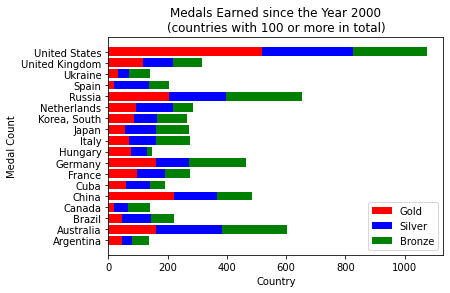

<Figure size 2160x1080 with 0 Axes>

In [12]:
goldMedals = df.Gold
silverMedals = df.Silver
bronzeMedals = df.Bronze
labels = df.Country
legendLabels = ['Gold', 'Silver', 'Bronze']
plt.barh(labels, goldMedals, color = 'red')
plt.barh(labels,silverMedals, color = 'blue', left = goldMedals)
plt.barh(labels,bronzeMedals, color='green', left = goldMedals + silverMedals)
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Medals Earned since the Year 2000\n(countries with 100 or more in total)')
plt.legend(legendLabels,loc=4)
plt.figure(figsize = (30,15))
plt.show()

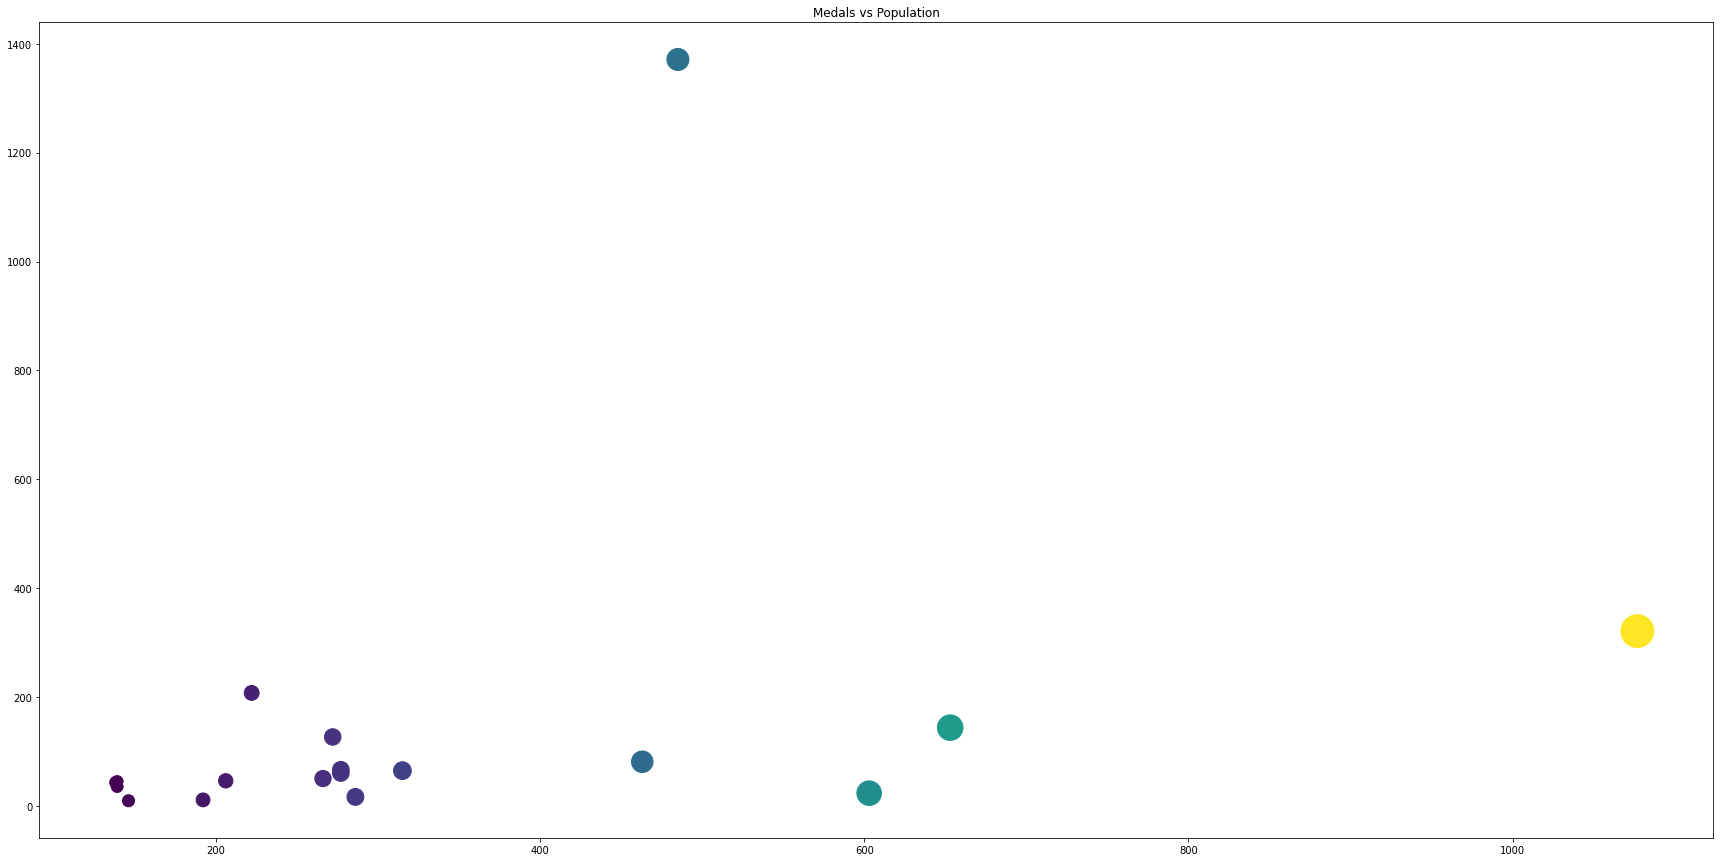

In [13]:
x = df.Total
y = df.Population
p = list(x)
labels = list(df.Country)
plt.figure(figsize=(30,15))
plt.title ('Medals vs Population')
plt.scatter(x, y, s = p, c = p)
plt.show()